In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join('..')))
from scripts.utils import *
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from model.Finetune import VGG16_Model, ResNet50_Model, InceptionV3_Model, DenseNet121_Model, MobileNetV2_Model

2023-06-25 16:08:47.437362: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 16:08:48.806414: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-06-25 16:08:48.806471: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory
2023-06-25 16:08:48.806478: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Cannot dlopen some TensorRT libraries. If you would like to use Nv

#### Using weights

In [2]:
# Init hyperparameters
epoch= 30
batch_size= 128
input_shape= (128, 128, 3)
using_class_weight= False
num_classes= 5

In [3]:
# load data
train_data, test_data= get_data('/media/data3/users/longnd/ML_prj/Data', input_shape, batch_size)

Found 10639 validated image filenames belonging to 5 classes.
Found 2662 validated image filenames belonging to 5 classes.


##### ResNet50

In [4]:

model= ResNet50_Model(input_shape= input_shape, num_classes= num_classes)
model_path = "/media/data3/users/longnd/ML_prj/checkpoints/resnet50.h5"
checkpoint = ModelCheckpoint(filepath= model_path,
                            save_weights_only= True,
                            monitor= 'val_accuracy',
                            save_best_only= True, verbose=1)

earlystop = EarlyStopping(monitor= 'val_accuracy', 
                          min_delta= 0.01, 
                          patience= 15,
                          verbose= 1,
                          restore_best_weights= True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)
model_compiling(model)

In [5]:
# train model
class_weight= get_balanced_weight(train_data)
if using_class_weight:
    print(class_weight)
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        class_weight=class_weight,
        callbacks=[earlystop, checkpoint, learning_rate_reduction])
else:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        callbacks=[earlystop, checkpoint, learning_rate_reduction])

Epoch 1/30
84/84 [==============================] - ETA: 0s - loss: 0.7339 - accuracy: 0.8534 - precision: 0.8890 - recall: 0.8224 - f1_score: 0.8544
Epoch 1: val_accuracy improved from -inf to 0.38204, saving model to /media/data3/users/longnd/ML_prj/checkpoints/resnet50.h5
84/84 [==============================] - 127s 1s/step - loss: 0.7339 - accuracy: 0.8534 - precision: 0.8890 - recall: 0.8224 - f1_score: 0.8544 - val_loss: 107.6778 - val_accuracy: 0.3820 - val_precision: 0.3820 - val_recall: 0.3820 - val_f1_score: 0.3820 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - ETA: 0s - loss: 0.4797 - accuracy: 0.9182 - precision: 0.9274 - recall: 0.9062 - f1_score: 0.9167
Epoch 2: val_accuracy did not improve from 0.38204
84/84 [==============================] - 102s 1s/step - loss: 0.4797 - accuracy: 0.9182 - precision: 0.9274 - recall: 0.9062 - f1_score: 0.9167 - val_loss: 4.1849 - val_accuracy: 0.2006 - val_precision: 0.2006 - val_recall: 0.2006 - val_f1_score: 0.2006 

In [6]:
parent_dir= '/media/data3/users/longnd/ML_prj/'
# save history
save_history_to_csv(history, os.path.join(parent_dir, 'history/resnet.csv'))

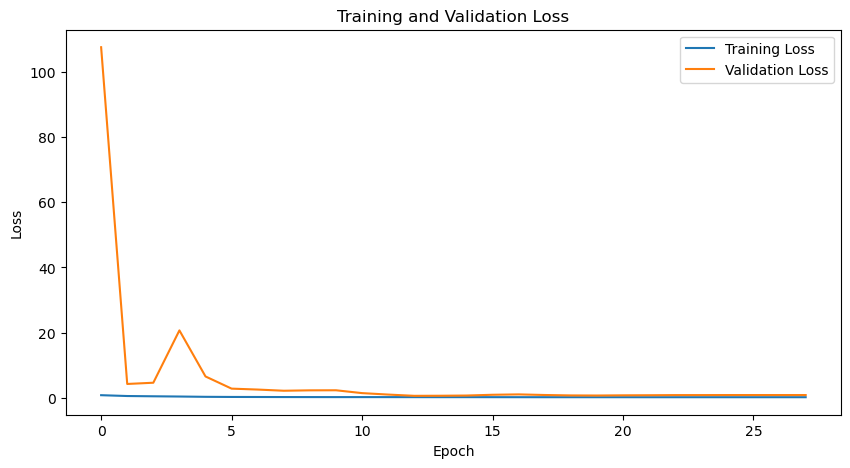

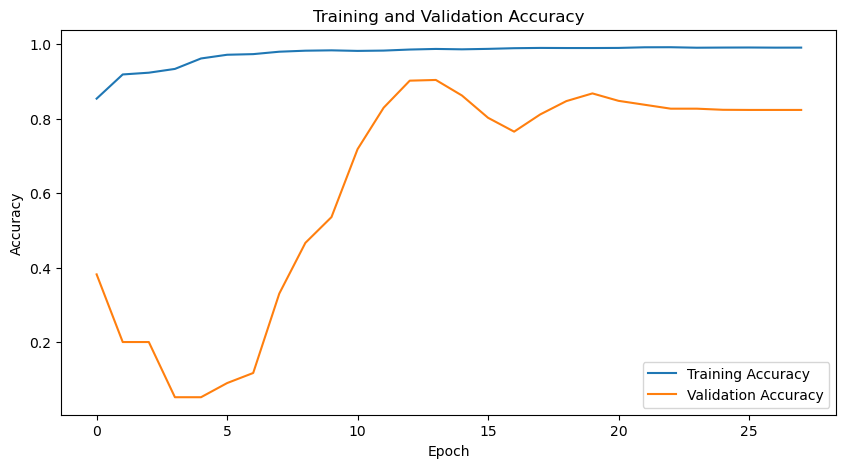

In [7]:
# plot history
plot_history(history)

In [8]:
# print result
get_report(model, test_data)

21/21 [==============================] - 6s 223ms/step
              precision    recall  f1-score   support

     COVID19       0.99      0.77      0.86       116
     NORMAL1       0.85      0.93      0.89      1017
   PNEUMONIA       0.98      0.97      0.98       855
TUBERCULOSIS       0.96      1.00      0.98       140
PNEUMOTHORAX       0.86      0.73      0.79       534

    accuracy                           0.90      2662
   macro avg       0.93      0.88      0.90      2662
weighted avg       0.90      0.90      0.90      2662



##### VGG16

In [4]:

model= VGG16_Model(input_shape= input_shape, num_classes= num_classes)
model_path = "/media/data3/users/longnd/ML_prj/checkpoints/vgg16.h5"
checkpoint = ModelCheckpoint(filepath= model_path,
                            save_weights_only= True,
                            monitor= 'val_accuracy',
                            save_best_only= True, verbose=1)

earlystop = EarlyStopping(monitor= 'val_accuracy', 
                          min_delta= 0.01, 
                          patience= 15,
                          verbose= 1,
                          restore_best_weights= True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)
model_compiling(model)

In [6]:
# train model
class_weight= get_balanced_weight(train_data)
if using_class_weight:
    print(class_weight)
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        class_weight=class_weight,
        callbacks=[earlystop, checkpoint, learning_rate_reduction])
else:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        callbacks=[earlystop, checkpoint, learning_rate_reduction])

Epoch 1/30


2023-06-25 12:57:28.769031: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2023-06-25 12:57:28.769055: W tensorflow/tsl/framework/bfc_allocator.cc:290] Allocator (GPU_0_bfc) ran out of memory trying to allocate 6.06GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.


84/84 [==============================] - ETA: 0s - loss: 1.6352 - accuracy: 0.3550 - precision: 0.3696 - recall: 0.0233 - f1_score: 0.0439
Epoch 1: val_accuracy improved from -inf to 0.40759, saving model to /media/data3/users/longnd/ML_prj/checkpoints/vgg16.h5
84/84 [==============================] - 114s 1s/step - loss: 1.6352 - accuracy: 0.3550 - precision: 0.3696 - recall: 0.0233 - f1_score: 0.0439 - val_loss: 1.4359 - val_accuracy: 0.4076 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: nan - lr: 0.0010
Epoch 2/30
84/84 [==============================] - ETA: 0s - loss: 1.4657 - accuracy: 0.3756 - precision: 0.4595 - recall: 0.0288 - f1_score: 0.0541
Epoch 2: val_accuracy did not improve from 0.40759
84/84 [==============================] - 101s 1s/step - loss: 1.4657 - accuracy: 0.3756 - precision: 0.4595 - recall: 0.0288 - f1_score: 0.0541 - val_loss: 1.4405 - val_accuracy: 0.3820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00 - val_f1_score: nan - lr: 

In [5]:
model.load_weights(model_path)

In [ ]:
parent_dir= '/media/data3/users/longnd/ML_prj/'
# save history
save_history_to_csv(history, os.path.join(parent_dir, 'history/vgg16.csv'))

In [ ]:
# plot history
plot_history(history)

In [6]:
# print result
get_report(model, test_data)

21/21 [==============================] - 35s 1s/step
              precision    recall  f1-score   support

     COVID19       1.00      0.51      0.67       116
     NORMAL1       0.81      0.95      0.87      1017
   PNEUMONIA       0.97      0.97      0.97       855
TUBERCULOSIS       0.98      0.96      0.97       140
PNEUMOTHORAX       0.86      0.68      0.76       534

    accuracy                           0.88      2662
   macro avg       0.92      0.81      0.85      2662
weighted avg       0.89      0.88      0.88      2662



##### InceptionV3

In [7]:

model= InceptionV3_Model(input_shape= input_shape, num_classes= num_classes)
model_path = "/media/data3/users/longnd/ML_prj/checkpoints/inceptionv3.h5"
checkpoint = ModelCheckpoint(filepath= model_path,
                            save_weights_only= True,
                            monitor= 'val_accuracy',
                            save_best_only= True, verbose=1)

earlystop = EarlyStopping(monitor= 'val_accuracy', 
                          min_delta= 0.01, 
                          patience= 15,
                          verbose= 1,
                          restore_best_weights= True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)
model_compiling(model)

87910968/87910968 [==============================] - 9s 0us/step


In [8]:
# train model
class_weight= get_balanced_weight(train_data)
if using_class_weight:
    print(class_weight)
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        class_weight=class_weight,
        callbacks=[earlystop, checkpoint, learning_rate_reduction])
else:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        callbacks=[earlystop, checkpoint, learning_rate_reduction])

Epoch 1/30
84/84 [==============================] - ETA: 0s - loss: 0.7807 - accuracy: 0.8330 - precision: 0.8801 - recall: 0.7882 - f1_score: 0.8316
Epoch 1: val_accuracy improved from -inf to 0.54658, saving model to /media/data3/users/longnd/ML_prj/checkpoints/inceptionv3.h5
84/84 [==============================] - 322s 4s/step - loss: 0.7807 - accuracy: 0.8330 - precision: 0.8801 - recall: 0.7882 - f1_score: 0.8316 - val_loss: 2.2026 - val_accuracy: 0.5466 - val_precision: 0.5549 - val_recall: 0.5391 - val_f1_score: 0.5469 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - ETA: 0s - loss: 0.4850 - accuracy: 0.9130 - precision: 0.9262 - recall: 0.8995 - f1_score: 0.9127
Epoch 2: val_accuracy improved from 0.54658 to 0.62810, saving model to /media/data3/users/longnd/ML_prj/checkpoints/inceptionv3.h5
84/84 [==============================] - 102s 1s/step - loss: 0.4850 - accuracy: 0.9130 - precision: 0.9262 - recall: 0.8995 - f1_score: 0.9127 - val_loss: 3.1708 - val_acc

In [9]:
parent_dir= '/media/data3/users/longnd/ML_prj/'
# save history
save_history_to_csv(history, os.path.join(parent_dir, 'history/inceptionv3.csv'))

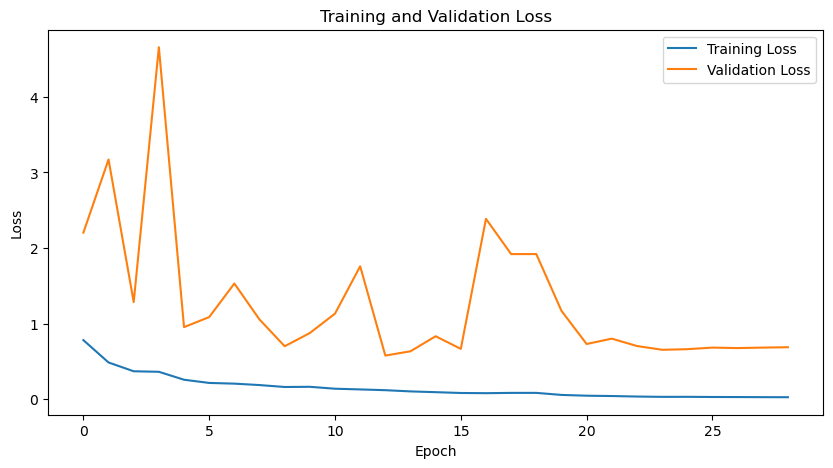

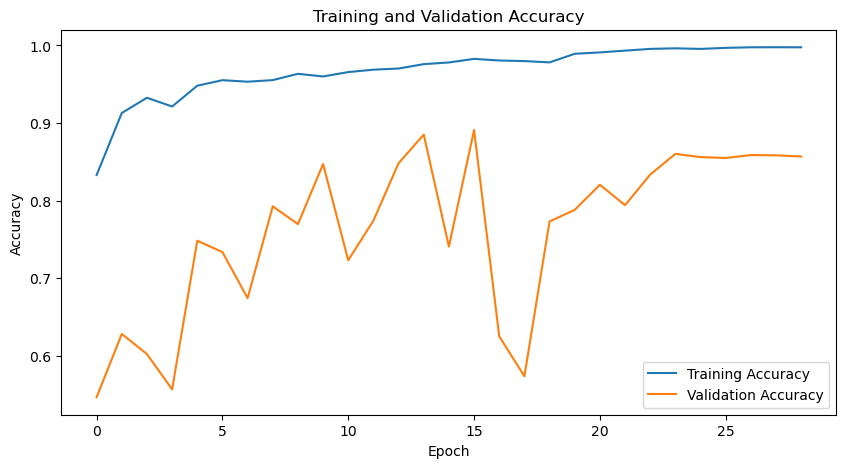

In [10]:
# plot history
plot_history(history)

In [11]:
# print result
get_report(model, test_data)

21/21 [==============================] - 7s 255ms/step
              precision    recall  f1-score   support

     COVID19       0.81      0.76      0.79       116
     NORMAL1       0.82      0.95      0.88      1017
   PNEUMONIA       0.96      0.96      0.96       855
TUBERCULOSIS       0.99      0.99      0.99       140
PNEUMOTHORAX       0.91      0.64      0.75       534

    accuracy                           0.89      2662
   macro avg       0.90      0.86      0.87      2662
weighted avg       0.89      0.89      0.88      2662



##### MobileNetV2

In [ ]:

model= MobileNetV2_Model(input_shape= input_shape, num_classes= num_classes)
model_path = "/media/data3/users/longnd/ML_prj/checkpoints/mobilenetv2.h5"
checkpoint = ModelCheckpoint(filepath= model_path,
                            save_weights_only= True,
                            monitor= 'val_accuracy',
                            save_best_only= True, verbose=1)

earlystop = EarlyStopping(monitor= 'val_accuracy', 
                          min_delta= 0.01, 
                          patience= 15,
                          verbose= 1,
                          restore_best_weights= True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)
model_compiling(model)

In [ ]:
# train model
class_weight= get_balanced_weight(train_data)
if using_class_weight:
    print(class_weight)
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        class_weight=class_weight,
        callbacks=[earlystop, checkpoint, learning_rate_reduction])
else:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        callbacks=[earlystop, checkpoint, learning_rate_reduction])

In [ ]:
parent_dir= '/media/data3/users/longnd/ML_prj/'
# save history
save_history_to_csv(history, os.path.join(parent_dir, 'history/mobilenetv2.csv'))

In [ ]:
# plot history
plot_history(history)

In [ ]:
# print result
get_report(model, test_data)

##### DenseNet121

In [4]:

model= DenseNet121_Model(input_shape= input_shape, num_classes= num_classes)
model_path = "/media/data3/users/longnd/ML_prj/checkpoints/densenet121.h5"
checkpoint = ModelCheckpoint(filepath= model_path,
                            save_weights_only= True,
                            monitor= 'val_accuracy',
                            save_best_only= True, verbose=1)

earlystop = EarlyStopping(monitor= 'val_accuracy', 
                          min_delta= 0.01, 
                          patience= 15,
                          verbose= 1,
                          restore_best_weights= True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.2, 
                                            min_lr=0.00000001)
model_compiling(model)

29084464/29084464 [==============================] - 3s 0us/step


In [5]:
# train model
class_weight= get_balanced_weight(train_data)
if using_class_weight:
    print(class_weight)
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        class_weight=class_weight,
        callbacks=[earlystop, checkpoint, learning_rate_reduction])
else:
    history = model.fit(
        train_data, 
        validation_data= test_data, 
        epochs=epoch, 
        callbacks=[earlystop, checkpoint, learning_rate_reduction])

Epoch 1/30
84/84 [==============================] - ETA: 0s - loss: 0.6528 - accuracy: 0.8531 - precision: 0.8807 - recall: 0.8260 - f1_score: 0.8525
Epoch 1: val_accuracy improved from -inf to 0.47859, saving model to /media/data3/users/longnd/ML_prj/checkpoints/densenet121.h5
84/84 [==============================] - 146s 1s/step - loss: 0.6528 - accuracy: 0.8531 - precision: 0.8807 - recall: 0.8260 - f1_score: 0.8525 - val_loss: 5.7139 - val_accuracy: 0.4786 - val_precision: 0.4800 - val_recall: 0.4767 - val_f1_score: 0.4783 - lr: 0.0010
Epoch 2/30
84/84 [==============================] - ETA: 0s - loss: 0.4150 - accuracy: 0.9146 - precision: 0.9222 - recall: 0.9044 - f1_score: 0.9132
Epoch 2: val_accuracy improved from 0.47859 to 0.54170, saving model to /media/data3/users/longnd/ML_prj/checkpoints/densenet121.h5
84/84 [==============================] - 103s 1s/step - loss: 0.4150 - accuracy: 0.9146 - precision: 0.9222 - recall: 0.9044 - f1_score: 0.9132 - val_loss: 3.4409 - val_acc

In [6]:
parent_dir= '/media/data3/users/longnd/ML_prj/'
# save history
save_history_to_csv(history, os.path.join(parent_dir, 'history/densenet121.csv'))

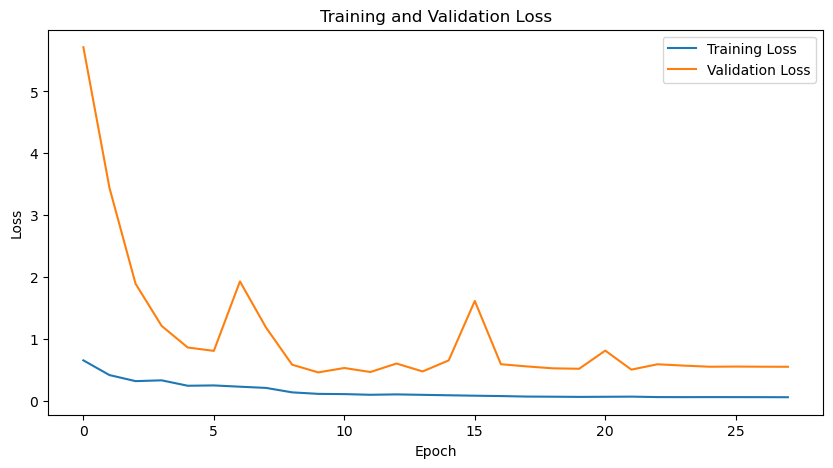

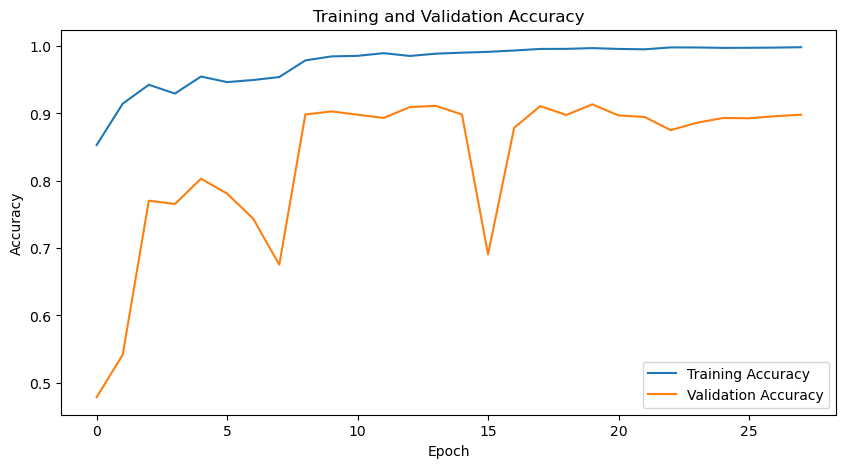

In [7]:
# plot history
plot_history(history)

In [8]:
# print result
get_report(model, test_data)

21/21 [==============================] - 6s 208ms/step
              precision    recall  f1-score   support

     COVID19       0.98      0.83      0.90       116
     NORMAL1       0.83      0.97      0.90      1017
   PNEUMONIA       0.98      0.98      0.98       855
TUBERCULOSIS       0.99      1.00      1.00       140
PNEUMOTHORAX       0.93      0.68      0.78       534

    accuracy                           0.91      2662
   macro avg       0.94      0.89      0.91      2662
weighted avg       0.92      0.91      0.91      2662



#### Using GAN